In [1]:
#importing the essential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import interpolate, signal, ndimage
from scipy import stats
from os import listdir
from os.path import isfile, join
from scipy.odr import Model, RealData, ODR
data_path = './data/'
fig_path = './fig/' 

In [2]:
data_file = [f for f in listdir(data_path) if isfile(join(data_path, f)) and f!= '.DS_Store']
data_file

['boiling_water_reverse_0000microA.CSV',
 'room_temp_reverse_0.000nA.CSV',
 'room_temp_forward_0.0000microA.CSV',
 'boiling_water_forward_00nA.CSV',
 'liquidN2_FB.csv',
 'room_temp_zener_forward_000nA_0.5Amplitude_0.25Offset.CSV',
 'room_temp_zener_reverse_000nA_1.3Amplitude_-2Offset.CSV',
 'ice_water_forward_0000microA.CSV',
 'ice_water_reverse_0000nA.CSV',
 'liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV']

In [3]:
datas = []
for data in data_file:
    df = pd.read_csv(data_path + data, skiprows = 15)
    df['NAME'] = data
    datas.append(df)
normalizing = [0.2e-9, 2e-9, 0.2e-6, 20e-9, 20e-6, 2e-9, 2e-9, 0.2e-6, 0.2e-9, 0.2e-3]
datas[-1]

,TIME,CH1,CH1 Peak Detect,NAME
0,-20.000,0.752,0.728,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
1,-19.992,0.752,0.784,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
2,-19.985,0.752,0.728,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
3,-19.977,0.752,0.784,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
4,-19.969,0.752,0.728,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
...,...,...,...,...
5195,19.900,0.920,0.952,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
5196,19.908,0.920,0.888,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
5197,19.916,0.920,0.952,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV
5198,19.923,0.920,0.896,liquid_N_forward_0.0000mA_cut_out_flat_bit.CSV


In [4]:
# cleaning
clean = []
for i in range(len(datas) - 1):
    new_data = datas[i][['TIME','CH1','CH2', 'NAME']]
    new_data = new_data.rename(columns={'CH1': 'V(V)', 'CH2': 'I(nA)'})
    
    if 'boiling' in data_file[i]:
        print("boiling")
        new_data['T(K)'] = 373
    elif 'room' in data_file[i]:
        print("room")
        new_data['T(K)'] = 298
    elif 'ice' in data_file[i]:
        print("ice")
        new_data['T(K)'] = 278
    elif 'liquid' in data_file[i]:
        print("N2")
        new_data['T(K)'] = 77.4
        
    if 'zener' in data_file[i]:
        new_data['type'] = 'zener'
    else:
        new_data['type'] = 'default'
        
    new_data['I(nA)'] = new_data['I(nA)']/2 * normalizing[i] * 1e9
        
    clean.append(new_data) 

boiling
room
room
boiling
N2
room
room
ice
ice


boiling_water_reverse_0000microA.CSV


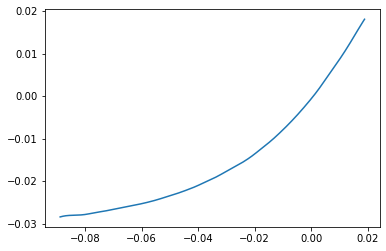

In [5]:
data = clean[0].loc[:1900].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 40)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 40)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'][0])
clean[0] = data.copy()

room_temp_reverse_0.000nA.CSV


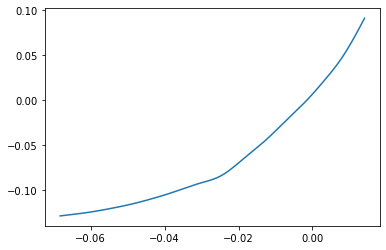

In [6]:
data = clean[1].loc[:1500].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 60)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 60)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'][0])
clean[1] = data.copy()

room_temp_forward_0.0000microA.CSV


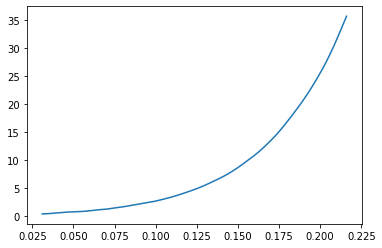

In [7]:
data = clean[2].loc[900:4800].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 60)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 60)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'].values[0])
clean[2] = data.copy()

boiling_water_forward_00nA.CSV


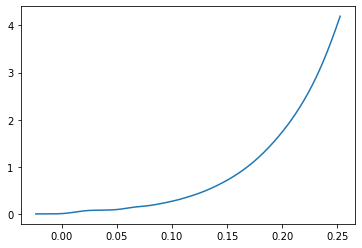

In [8]:
data = clean[3].loc[2000:4000].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 60)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 60)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'].values[0])
clean[3] = data.copy()

liquidN2_FB.csv


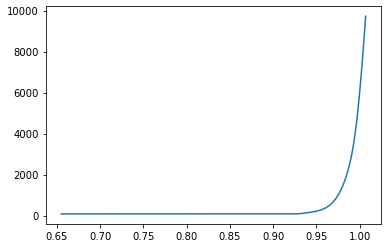

In [9]:
data = clean[4].loc[1000:4900].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 60)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 60)
plt.plot(data['V(V)']
          ,data['I(nA)'] )
print(data['NAME'].values[0])
clean[4] = data.copy()

room_temp_zener_forward_000nA_0.5Amplitude_0.25Offset.CSV


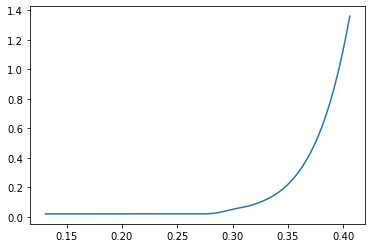

In [10]:
data = clean[5].loc[2000:4000].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 60)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 60)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'].values[0])
clean[5] = data.copy()

room_temp_zener_reverse_000nA_1.3Amplitude_-2Offset.CSV


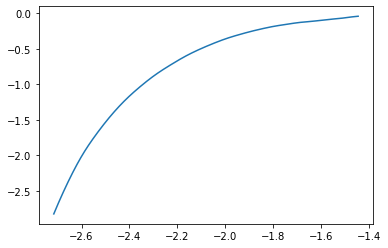

In [11]:
data = clean[6].loc[1800:3900].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 60)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 60)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'].values[0])
clean[6] = data.copy()

ice_water_forward_0000microA.CSV


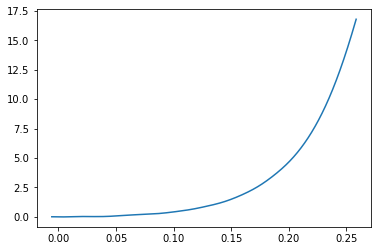

In [12]:
data = clean[7].loc[1400:3301].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 60)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 60)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'].values[0])
clean[7] = data.copy()

ice_water_reverse_0000nA.CSV


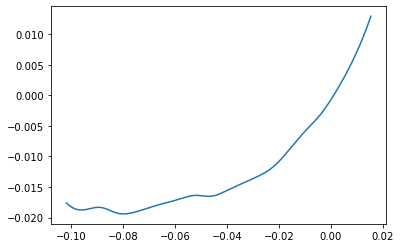

In [13]:
data = clean[8].loc[1100:3201].copy()
data['V(V)'] = ndimage.gaussian_filter(data['V(V)'], sigma = 70)
data['I(nA)'] = ndimage.gaussian_filter(data['I(nA)'], sigma = 70)
plt.plot(data['V(V)']
         , data['I(nA)'])
print(data['NAME'].values[0])
clean[8] = data.copy()

In [14]:
concat_data = pd.concat(clean)
concat_data

,TIME,V(V),I(nA),NAME,T(K),type
0,-20.000,-0.088761,-0.028400,boiling_water_reverse_0000microA.CSV,373.0,default
1,-19.992,-0.088760,-0.028400,boiling_water_reverse_0000microA.CSV,373.0,default
2,-19.985,-0.088758,-0.028400,boiling_water_reverse_0000microA.CSV,373.0,default
3,-19.977,-0.088754,-0.028399,boiling_water_reverse_0000microA.CSV,373.0,default
4,-19.969,-0.088750,-0.028398,boiling_water_reverse_0000microA.CSV,373.0,default
...,...,...,...,...,...,...
3197,4.550,0.015365,0.012959,ice_water_reverse_0000nA.CSV,278.0,default
3198,4.560,0.015368,0.012963,ice_water_reverse_0000nA.CSV,278.0,default
3199,4.570,0.015370,0.012965,ice_water_reverse_0000nA.CSV,278.0,default
3200,4.580,0.015372,0.012967,ice_water_reverse_0000nA.CSV,278.0,default


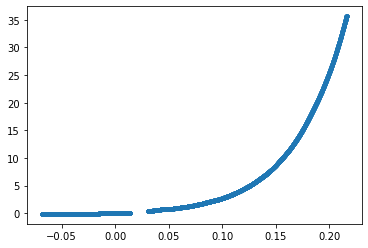

In [15]:
room = np.logical_and(concat_data['type'] == 'default', concat_data['T(K)'] == 298)
room_df = concat_data[room]
plt.plot(room_df['V(V)'], room_df['I(nA)'], '.')

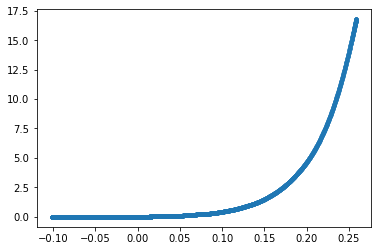

In [16]:
ice = np.logical_and(concat_data['type'] == 'default', concat_data['T(K)'] == 278)
ice_df = concat_data[ice]
plt.plot(ice_df['V(V)'], ice_df['I(nA)'], '.')


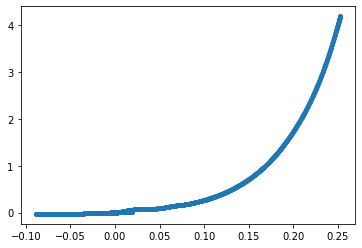

In [17]:
boil = np.logical_and(concat_data['type'] == 'default', concat_data['T(K)'] == 373)
boil_df = concat_data[boil]
plt.plot(boil_df['V(V)'], boil_df['I(nA)'], '.')


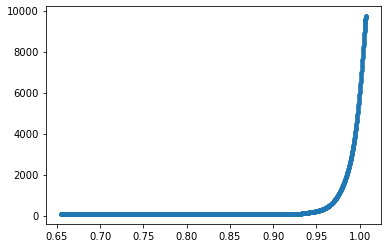

In [18]:
N2 = np.logical_and(concat_data['type'] == 'default', concat_data['T(K)'] == 77.4)
N2_df = concat_data[N2]
plt.plot(N2_df['V(V)'], N2_df['I(nA)'], '.')

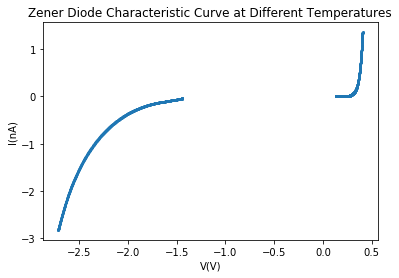

In [19]:
zener = np.logical_and(concat_data['type'] == 'zener', concat_data['T(K)'] == 298)
zener_df = concat_data[zener]
plt.plot(zener_df['V(V)'], zener_df['I(nA)'], '.', markersize = 2)
plt.title('Zener Diode Characteristic Curve at Different Temperatures')
plt.xlabel('V(V)')
plt.ylabel('I(nA)')
plt.savefig(fig_path + 'zener.png', dpi = 300)

Text(0, 0.5, 'I(nA)')

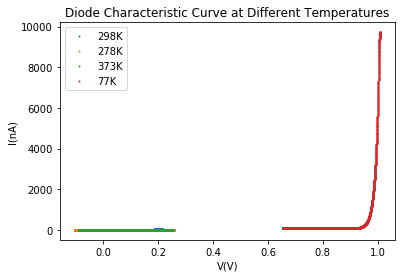

In [20]:
plt.plot(room_df['V(V)'], room_df['I(nA)'],'.', markersize = 2, label = '298K')
plt.plot(ice_df['V(V)'], ice_df['I(nA)'], '.', markersize = 2, label = '278K')
plt.plot(boil_df['V(V)'], boil_df['I(nA)'],'.', markersize = 2, label = '373K')
plt.plot(N2_df['V(V)'], N2_df['I(nA)'],'.', markersize = 2, label = '77K')
plt.legend()
plt.title('Diode Characteristic Curve at Different Temperatures')
plt.xlabel('V(V)')
plt.ylabel('I(nA)')


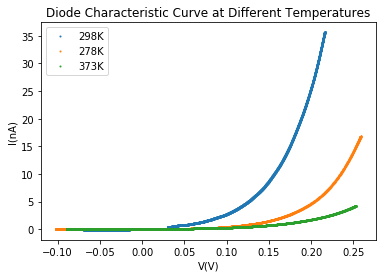

In [21]:
plt.plot(room_df['V(V)'], room_df['I(nA)'],'.', markersize = 2, label = '298K')
plt.plot(ice_df['V(V)'], ice_df['I(nA)'], '.', markersize = 2, label = '278K')
plt.plot(boil_df['V(V)'], boil_df['I(nA)'],'.', markersize = 2, label = '373K')
plt.legend()
plt.title('Diode Characteristic Curve at Different Temperatures')
plt.xlabel('V(V)')
plt.ylabel('I(nA)')
plt.savefig(fig_path + 'Temp.png', dpi = 300)


In [22]:
# save processed data
room_df.to_csv(data_path + 'cleaned/'+'room.csv')
boil_df.to_csv(data_path + 'cleaned/'+'boil.csv')
ice_df.to_csv(data_path + 'cleaned/'+'ice.csv')
N2_df.to_csv(data_path + 'cleaned/'+'N2.csv')
zener_df.to_csv(data_path + 'cleaned/'+'zenor.csv')



In [23]:
model2 = Model(I2)
myodr2 = ODR(data, model2, beta0 = [1.0, 1.0], maxit = 1000)
myoutput2 = myodr2.run()
myoutput2.pprint()

NameError: name 'I2' is not defined

In [ ]:
concat_default = concat_data[concat_data['type'] == 'default'].copy()
concat_default['I_fit'] = I(myoutput.beta, concat_default[['V(V)', 'T(K)']].values.T)
concat_default['I_fit_2'] = I2(myoutput2.beta, concat_default[['V(V)', 'T(K)']].values.T)
concat_default

In [ ]:
room = concat_default['T(K)'] == 298
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I(nA)'], '.', label = 'experiment')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit'], '.', label = 'fit1')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit_2'], '.', label = 'fit2')
plt.legend()

In [ ]:
room = concat_default['T(K)'] == 278
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I(nA)'], '.', label = 'experiment')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit'], '.', label = 'fit1')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit_2'], '.', label = 'fit2')
plt.legend()

In [ ]:
room = concat_default['T(K)'] == 373
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I(nA)'], '.', label = 'experiment')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit'], '.', label = 'fit1')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit_2'], '.', label = 'fit2')
plt.legend()

In [ ]:
room = concat_default['T(K)'] == 77.4
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I(nA)'], '.', label = 'experiment')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit'], '.', label = 'fit1')
plt.plot(concat_default[room]['V(V)'], concat_default[room]['I_fit_2'], '.', label = 'fit2')
plt.legend()